## Analysing No shows for Medical Appointment Dataset

### The following questions are addressed by Exploratory Data Analysis

1. Is age a factor in patients not showing up for an appointment?

2. Does the number of days between booking an appointment and the actual appointment date affect patients showing up for an appointment?

3. Is there any relationshup between gender and patients not showing up for an appointment?

4. If the patients received SMS, does it increase the chances of patients not missing their appointment?

5. Does Scholarship, hypertension, handicap, diabetes or alcoholism have an effect on patients not showing up for an appointment? 

In [2]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC

sns.set()

In [4]:
data = pd.read_csv(r'data/Medical_appointment.csv', parse_dates=['ScheduledDay','AppointmentDay'])

In [5]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [7]:
#Changing the typos in the headers of the dataframe
data.rename(columns ={'Hipertension':'Hypertension','Handcap':'Handicap'}, inplace=True)

### Meaning for all the columns in the dataframe

PatientId - Identification of a patient

AppointmentID - Identification of each appointment

Gender - Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison 
to man.

DataMarcacaoConsulta(ScheduledDay) - The day of the actual appointment, when they have to visit the doctor.

DataAgendamento(AppointmentDay) - The day someone called or registered the appointment, this is before appointment of course.

Age - How old is the patient.

Neighbourhood - Where the appointment takes place.

Scholarship - True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

Hipertension - True or False

Diabetes - True or False

Alcoholism - True or False

Handcap - True or False

SMS_received - 1 or more messages sent to the patient.

No-show - True or False. Yes- Person did not show up. No - Person showed up

## First Impression on Analysing the data

 1. There are no missing values for any feature
 2. age: average is 37 years, there is one negative value, 25% of patients are under 18 years and 25% of patients are over 55 years
 3. Scholarship: less than 10% of patients 
 4. Hypertension: less than 20% of patients 
 5. Diabetes: less than 8% of patients
 6. Alcoholics: less than 4% of patients
 7. Handicap: less than 3% of patients - handicap should be 1 or 0 but it has a max value of 4
 8. No-show: less than 25% of patients

### Finding the number of days between appointment scheduled and the appointment day

In [8]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
data['AppointmentDay'] = pd.to_datetime(data.AppointmentDay).dt.date
data['ScheduledDay'] = pd.to_datetime(data.ScheduledDay).dt.date

In [10]:
data['Wait_days'] = (data['AppointmentDay'] - data['ScheduledDay']).dt.days

## Cleaning the Data

### Replace all values over 1 with 1 as this is a bool column

In [11]:
data['Handicap'].replace({2:1,3:1,4:1},inplace=True)

### Drop row in which age is less than 1

In [12]:
data = data[~data['Age']<0]

### In five cases, the actual appointment day is before the day of scheduling - error in appointment scheduling 

In [13]:
data = data[~data['Wait_days']<0]

### Calculating the percentage of no-shows for appointments

In [17]:
(data['No-show'].value_counts(normalize=True)*100).round(2)

No     79.81
Yes    20.19
Name: No-show, dtype: float64

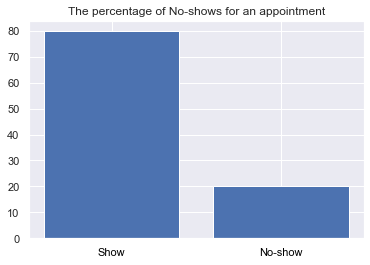

In [18]:
plt.bar(x=['Show', 'No-show'],height = data['No-show'].value_counts(normalize=True)*100)
plt.xticks([0,1], color='black', rotation='horizontal')
plt.title('The percentage of No-shows for an appointment')
plt.show()

### Histogram of age

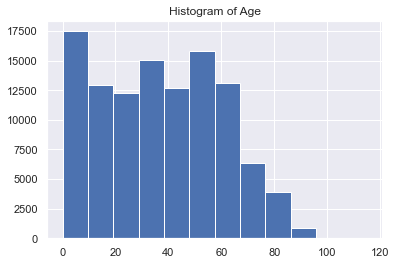

In [19]:
plt.hist(data['Age'],12)
plt.title('Histogram of Age')
plt.show()

### Binning age data

In [80]:
bins=np.linspace(data['Age'].min(),data['Age'].max(),13)
data['age_bins'] = pd.cut(data['Age'],bins=bins,
                          labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80',
                                  '80-90','90-100','100-110','110-120'], include_lowest=True)

### Is there any relationship between age and showing up for an appointment?

In [81]:
data.groupby([data['age_bins'],data['No-show']]).agg({'No-show':'count'})

No-show
age_bins No-show         
0-10     No         13991
         Yes         3483
10-20    No          9679
         Yes         3256
20-30    No          9246
         Yes         3049
30-40    No         11748
         Yes         3289
40-50    No         10043
         Yes         2651
50-60    No         12996
         Yes         2825
60-70    No         11102
         Yes         2023
70-80    No          5360
         Yes          960
80-90    No          3295
         Yes          625
90-100   No           708
         Yes          146
100-110  No            37
         Yes            4
110-120  No             2
         Yes            3

#### No conclusive relationship between age and No-show ups. The 60% of no-show up in age 110-120 is only because the number of patients in that age population is very less

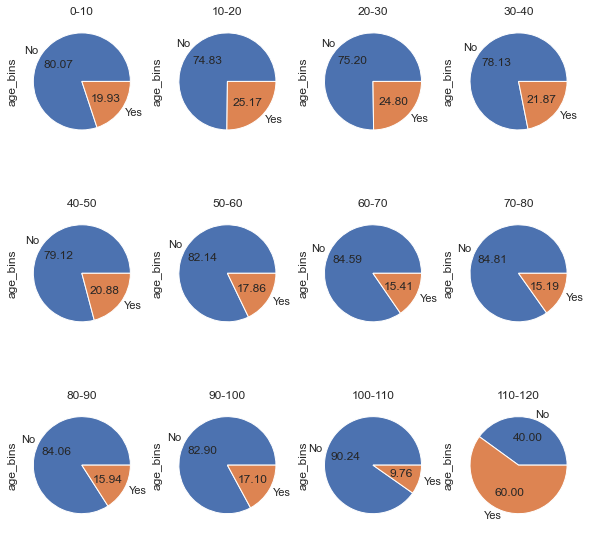

In [82]:
fig, axs = plt.subplots(3,4)
data[data['age_bins']=='0-10'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[0,0],title="0-10")
data[data['age_bins']=='10-20'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[0,1],title="10-20")
data[data['age_bins']=='20-30'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[0,2],title="20-30")
data[data['age_bins']=='30-40'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[0,3],title="30-40")
data[data['age_bins']=='40-50'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1,0],title="40-50")
data[data['age_bins']=='50-60'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1,1],title="50-60")
data[data['age_bins']=='60-70'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1,2],title="60-70")
data[data['age_bins']=='70-80'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1,3],title="70-80")
data[data['age_bins']=='80-90'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[2,0],title="80-90")
data[data['age_bins']=='90-100'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[2,1],title="90-100")
data[data['age_bins']=='100-110'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[2,2],title="100-110")
data[data['age_bins']=='110-120'].groupby('No-show')['age_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[2,3],title="110-120")
plt.show()

### Is there any relationship between gender and showing up for an appointment?
#### No relationship between gender and no-shows because both led to a result of approx. 25% no-shows

<AxesSubplot:xlabel='Gender,No-show'>

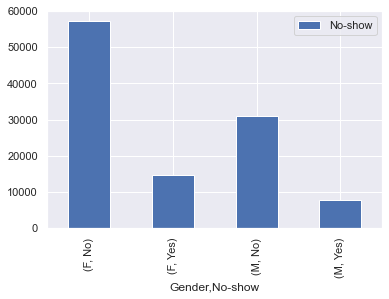

In [83]:
data.groupby([data['Gender'],data['No-show']]).agg({'No-show':'count'}).plot(kind='bar')#.reset_index()

In [84]:
bins=np.linspace(data['Wait_days'].min(),data['Wait_days'].max(),10)
data['wait-day_bins'] = pd.cut(data['Wait_days'],bins=bins, include_lowest=True,
                          labels=['0-20','20-40','40-60','60-80','80-100','100-120','120-140','140-160', '160-180'])

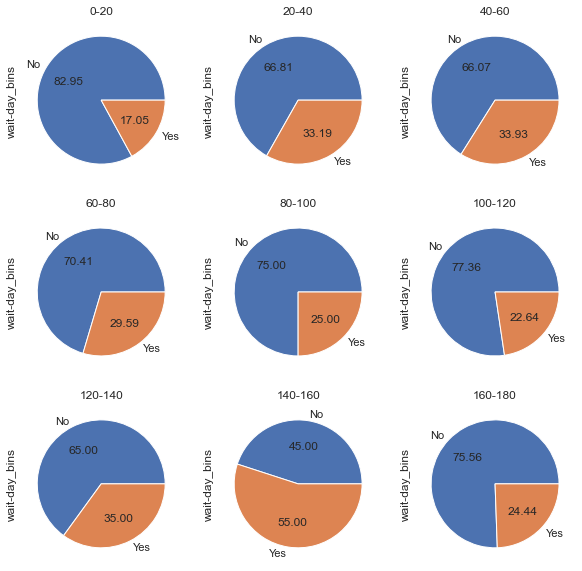

In [85]:
fig, axs = plt.subplots(3,3)
data[data['wait-day_bins']=='0-20'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[0,0],title="0-20")
data[data['wait-day_bins']=='20-40'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[0,1],title="20-40")
data[data['wait-day_bins']=='40-60'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[0,2],title="40-60")
data[data['wait-day_bins']=='60-80'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1,0],title="60-80")
data[data['wait-day_bins']=='80-100'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1,1],title="80-100")
data[data['wait-day_bins']=='100-120'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[1,2],title="100-120")
data[data['wait-day_bins']=='120-140'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[2,0],title="120-140")
data[data['wait-day_bins']=='140-160'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[2,1],title="140-160")
data[data['wait-day_bins']=='160-180'].groupby('No-show')['wait-day_bins'].count().plot(figsize=(10,10),kind="pie",autopct='%.2f',ax=axs[2,2],title="160-180")
plt.show()

### Handicap and its impact on No-show ups

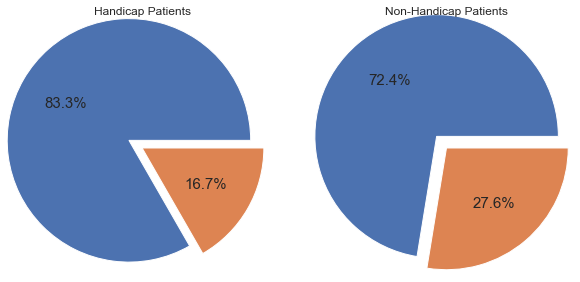

In [86]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].pie(data[data['SMS_received']==0].groupby('No-show')['SMS_received'].count(),explode=(0.15, 0),radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[0].set_title('Handicap Patients')
axs[1].pie(data[data['SMS_received']==1].groupby('No-show')['SMS_received'].count(),explode=(0.15, 0), radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[1].set_title('Non-Handicap Patients')
plt.show()

### SMS received and its impact on No-show ups

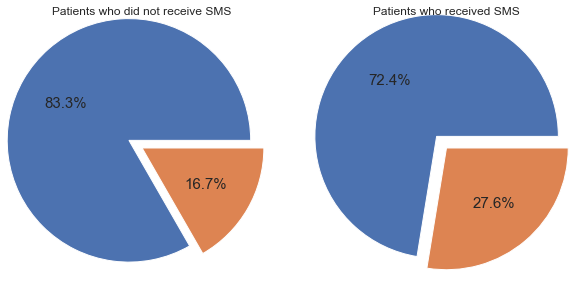

In [87]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].pie(data[data['SMS_received']==0].groupby('No-show')['SMS_received'].count(),explode=(0.15, 0),radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[0].set_title('Patients who did not receive SMS')
axs[1].pie(data[data['SMS_received']==1].groupby('No-show')['SMS_received'].count(),explode=(0.15, 0), radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[1].set_title('Patients who received SMS')
plt.show()

### Scholarship and its impact on No-show ups

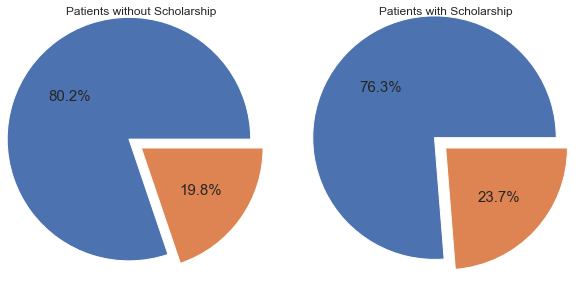

In [88]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].pie(data[data['Scholarship']==0].groupby('No-show')['Scholarship'].count(),explode=(0.15, 0),radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[0].set_title('Patients without Scholarship')
axs[1].pie(data[data['Scholarship']==1].groupby('No-show')['Scholarship'].count(),explode=(0.15, 0), radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[1].set_title('Patients with Scholarship')
plt.show()

### Hypertension and its impact on No-show ups

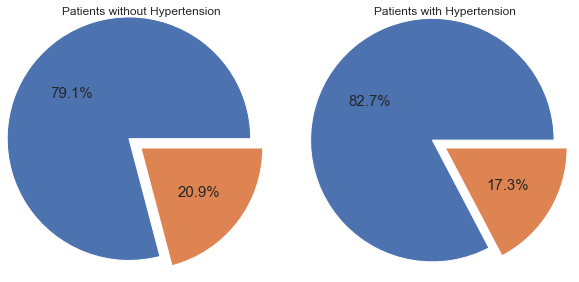

In [89]:
fig, axs = plt.subplots(1,2, figsize=(10,10))
axs[0].pie(data[data['Hypertension']==0].groupby('No-show')['Hypertension'].count(),explode=(0.15, 0),radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[0].set_title('Patients without Hypertension')
axs[1].pie(data[data['Hypertension']==1].groupby('No-show')['Hypertension'].count(),explode=(0.15, 0), radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[1].set_title('Patients with Hypertension')
plt.show()

### Alcoholism and its impact on No-show ups

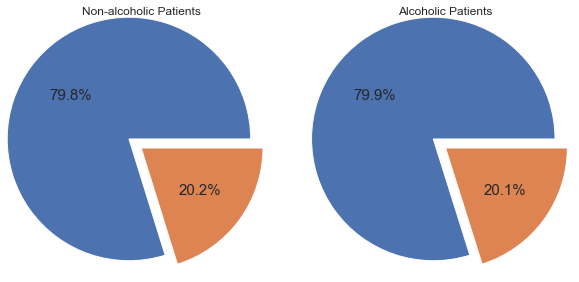

In [90]:
fig, axs = plt.subplots(1,2,figsize=(10,10))
axs[0].pie(data[data['Alcoholism']==0].groupby('No-show')['Alcoholism'].count(),explode=(0.15, 0), radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[0].set_title('Non-alcoholic Patients')
axs[1].pie(data[data['Alcoholism']==1].groupby('No-show')['Alcoholism'].count(),explode=(0.15, 0), radius=1.2,autopct='%0.1f%%', textprops = {"fontsize":15})
axs[1].set_title('Alcoholic Patients')
plt.show()

In [91]:
data['No-show'].replace({'Yes':1,'No':0},inplace=True)

In [92]:
cols = ['Handicap','Hypertension','Scholarship','Diabetes','SMS_received','Alcoholism','No-show']
for column in cols:
    data[column] = data[column].astype(bool)
    data[column] = data[column].astype(int)

In [93]:
df = pd.DataFrame(data.groupby(['Neighbourhood','No-show'],as_index=False).agg({'No-show':'sum'}).sort_values(by='No-show',ascending=False))

In [94]:
df

,Neighbourhood,No-show
76,JARDIM CAMBURI,1465
86,MARIA ORTIZ,1219
72,ITARARÉ,923
117,RESISTÊNCIA,905
21,CENTRO,703
...,...,...
89,MATA DA PRAIA,0
30,DA PENHA,0
87,MARUÍPE,0
32,DE LOURDES,0


In [95]:
df1 = data.Neighbourhood.value_counts(ascending=False).rename_axis('Total').reset_index('Total')

In [97]:
pd.merge(df,df1, left_on='Neighbourhood',right_on='Total')

,Neighbourhood_x,No-show,Total,Neighbourhood_y
0,JARDIM CAMBURI,1465,JARDIM CAMBURI,7717
1,JARDIM CAMBURI,0,JARDIM CAMBURI,7717
2,MARIA ORTIZ,1219,MARIA ORTIZ,5805
3,MARIA ORTIZ,0,MARIA ORTIZ,5805
4,ITARARÉ,923,ITARARÉ,3514
...,...,...,...,...
155,ILHA DO FRADE,2,ILHA DO FRADE,10
156,ILHA DO FRADE,0,ILHA DO FRADE,10
157,AEROPORTO,1,AEROPORTO,8
158,AEROPORTO,0,AEROPORTO,8


### Do the number of waiting days have an effect in patients showing up?
#### The mean and median number number of wait days is much larger for no-shows meaning that when the wait times are longer, the chances that a patient may show up for an appointment in lesser 

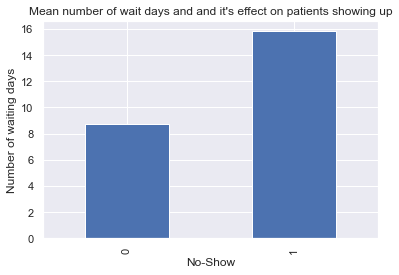

In [98]:
data.groupby('No-show')['Wait_days'].mean().plot(kind='bar')
plt.title("Mean number of wait days and and it's effect on patients showing up")
plt.xlabel('No-Show')
plt.ylabel('Number of waiting days');
plt.show()

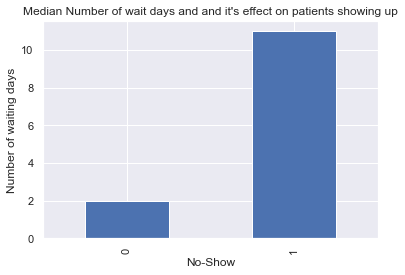

In [99]:
data.groupby('No-show')['Wait_days'].median().plot(kind='bar')
plt.title("Median Number of wait days and and it's effect on patients showing up")
plt.xlabel('No-Show')
plt.ylabel('Number of waiting days');
plt.show()

### Correlation Heatmap between features

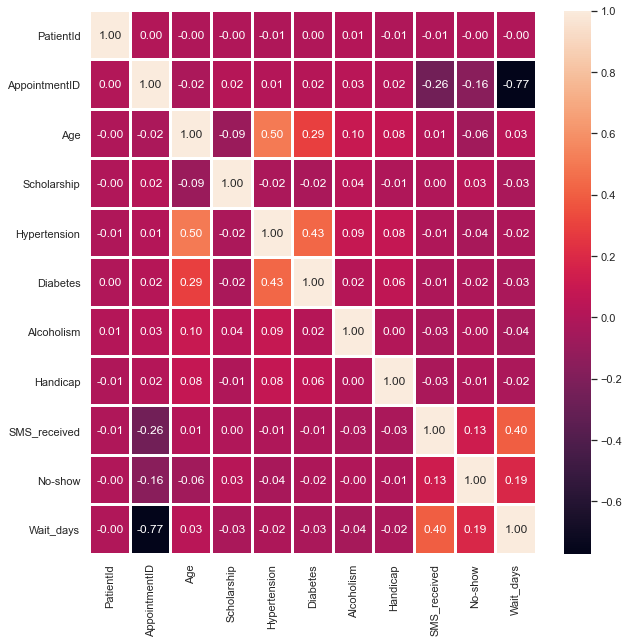

In [100]:
data_corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_corr,annot=True,linewidths=2,fmt='0.2f')
plt.show()

### Conclusions:
    
Percentage of patients who show up to their appointments are 79.81% and who missed their appointments are 20.19%

Factors like Scholarship, handicap, hypertension, diabetes and alchoholism do not have an effect of people showing up to the appointment but we cannot draw any conclusions based on this because the percentage of patients affected with the above factors were minimal in the dataset

Gender and age also do not play a significant role in people showing up to their appointments

Although 68% of the patients did not receive SMS, they still showed up to their appointments